# CHEN 2450 - Interpolation - Coding Activity 1
## Prof. Tony Saad

In [1]:
import numpy as np
from numpy import interp
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

Consider the temperature and density data for air at atmospheric pressure. These are given in the notes in class and provided here for your convenience.

In [2]:
T = np.linspace(100,1000,19)
print(T)
ρ = np.array([
    3.5562,
    2.3364,
    1.7458,
    1.3947,
    1.1614,
    0.995,
    0.8711,
    0.775,
    0.6864,
    0.6329,
    0.5804,
    0.5356,
    0.4975,
    0.4643,
    0.4354,
    0.4097,
    0.3868,
    0.3666,
    0.3482])

[ 100.  150.  200.  250.  300.  350.  400.  450.  500.  550.  600.  650.
  700.  750.  800.  850.  900.  950. 1000.]


The first thing to do when presented with data is to get familiar with it. Plot the density versus the temperature of air.

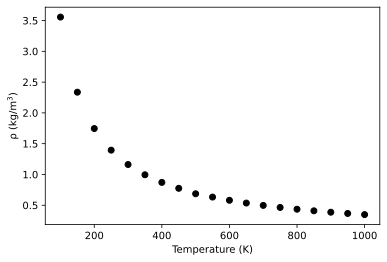

In [3]:
plt.plot(T, ρ, "ko")
plt.xlabel("Temperature (K)")
plt.ylabel("ρ (kg/m$^3$)");

Always plot a scatter, without connecting the dots. However, to show what "linear" interpolation looks like, you can connect the dots by adding a '-' to the plot symbol, i.e. 'ko-'

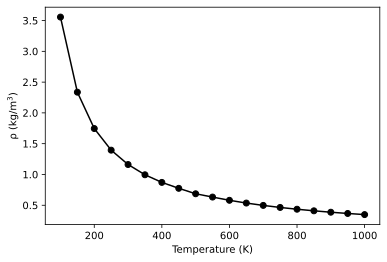

In [4]:
plt.plot(T, ρ, "ko-")
plt.xlabel("Temperature (K)")
plt.ylabel("ρ (kg/m$^3$)");

# Linear Interpolation

$$
y = \frac{y_2-y_1}{x_2-x_1}(x-x_1)+y_1
$$

Use numpy's interp function to find the density at T = 132 F

In [5]:
interp(132, T[0:2], ρ[0:2])

2.775528

Your goal now to find the dentisty at T = [123, 251,443,599,602,899] using numpy's interp function. Identify your input independent and dependent variables (xi and yi) and the points at which you want to interpolate xe

In [6]:
xe = [123, 251, 443, 599, 602, 899]
ye = interp(xe, T, ρ)
print(ye)

[2.995092 1.390034 0.788454 0.58145  0.578608 0.387258]


Now plot these points on top of the original data

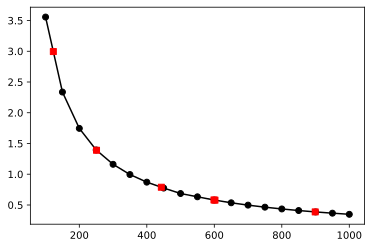

In [7]:
plt.plot(T,ρ,'ko-') # plot original data
plt.plot(xe, ye, 'rs') # plot interpolated points with red squares

Now create a linearspace of 100 points for the temperature, interpolate the data to those points, and plot the data on top of the original data

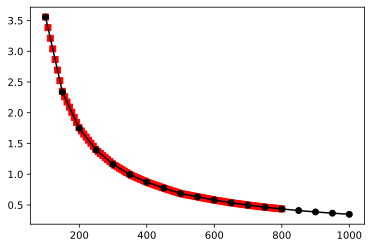

In [8]:
xe = np.linspace(100, 800, 100)
ye = interp(xe,T,ρ)
plt.plot(xe,ye,'rs')
plt.plot(T,ρ,'ko-')

## Inverse Interpolation

Suppose now that we want to find the temperature given a density value. For example, find the temperature at which the density of air at atmospheric pressure is $\rho = 2.3364$. The tabulated data should return T = 150 exactly. Use the interp function to calculate the temperature and explain your result.

In [9]:
interp(2.3364, ρ, T)

1000.0

There is clearly a problem here.

For linear interpolation to work properly on a large dataset, the values for the independent variable need to be sorted. You can easily sort data in python using sort, flipud, and argsort. However, do NOT forget to also adjust the values in the values of the dependent variable.

In this example, now that we switched meaning of independent and dependent variable, the density is now our independent variable and the temperature is our dependent variable. 

In [10]:
idx = np.argsort(ρ)
ρsorted = ρ[idx]
print(ρsorted)
Tnew = T[idx]
print(Tnew)

[0.3482 0.3666 0.3868 0.4097 0.4354 0.4643 0.4975 0.5356 0.5804 0.6329
 0.6864 0.775  0.8711 0.995  1.1614 1.3947 1.7458 2.3364 3.5562]
[1000.  950.  900.  850.  800.  750.  700.  650.  600.  550.  500.  450.
  400.  350.  300.  250.  200.  150.  100.]


In [11]:
interp(2.3364,ρsorted,Tnew)

150.0

# Polynomial Interpolation

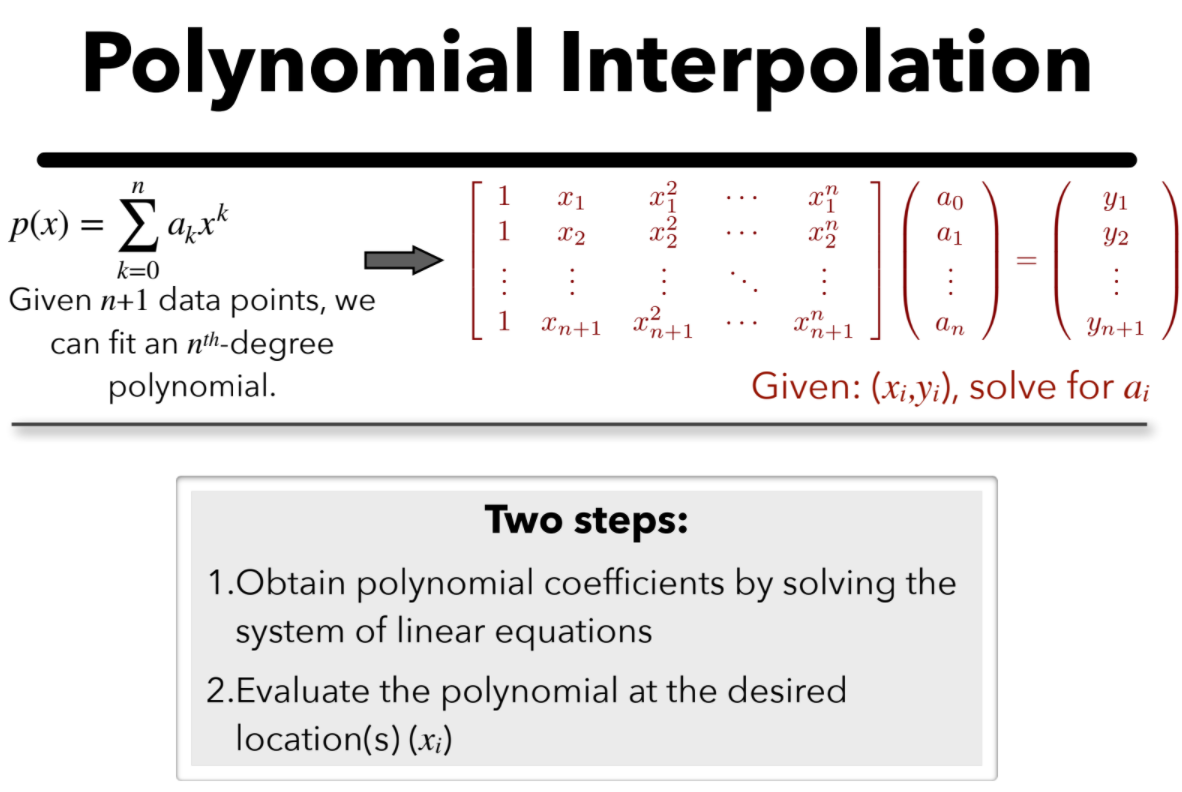

Let us now attempt to do polynomial interpolation on the density/temperature dataset for air

In [12]:
from numpy import polyfit, polyval

In [13]:
coefs = polyfit(T, ρ, len(T)-1)
print(coefs)

[ 5.83350094e-46 -4.83329069e-42  1.78404298e-38 -3.80208396e-35
  4.96120919e-32 -3.53072070e-29 -7.44286851e-28  3.36462865e-23
 -4.40080019e-20  3.42436213e-17 -1.87182616e-14  7.54432506e-12
 -2.27438331e-09  5.11356821e-07 -8.43181570e-05  9.86352783e-03
 -7.71160473e-01  3.58948126e+01 -7.42642716e+02]


C:\Users\ethan\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


What is stored in coefs?

Evaluate the density at T = 412 and 415

In [14]:
polyval(coefs, [412, 415])

array([0.8473053 , 0.84124234])

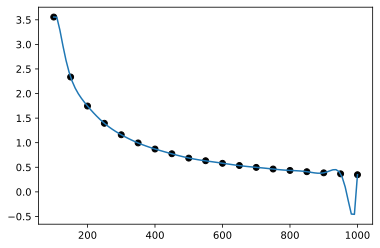

In [15]:
Tnew = np.linspace(100, 1000, 100)
ρnew = polyval(coefs, Tnew)
plt.plot(T, ρ, 'ko')
plt.plot(Tnew, ρnew)
plt.show()

Evaluate the density at T = 980 K. Does your answer make sense? How could we explain this?

In [16]:
polyval(coefs, 980)

-0.407595490059407

[ 2.03846388e-09  4.35918612e-06 -1.43677494e-03  1.00391249e+01]


C:\Users\ethan\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


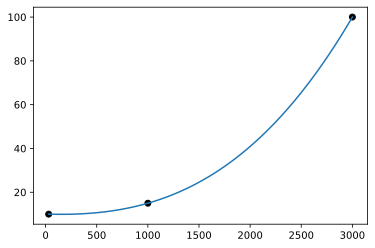

10.039124942202335


In [31]:
mask = [30, 1000, 3000]
batch = [10, 15, 100]
coefs = polyfit(mask, batch, 3)
print(coefs)
mnew = np.linspace(30, 3000, 90)
bnew = polyval(coefs, mnew)
plt.plot(mask, batch, 'ko')
plt.plot(mnew, bnew)
plt.show()
print(polyval(coefs, 0))

# Cubic Splines

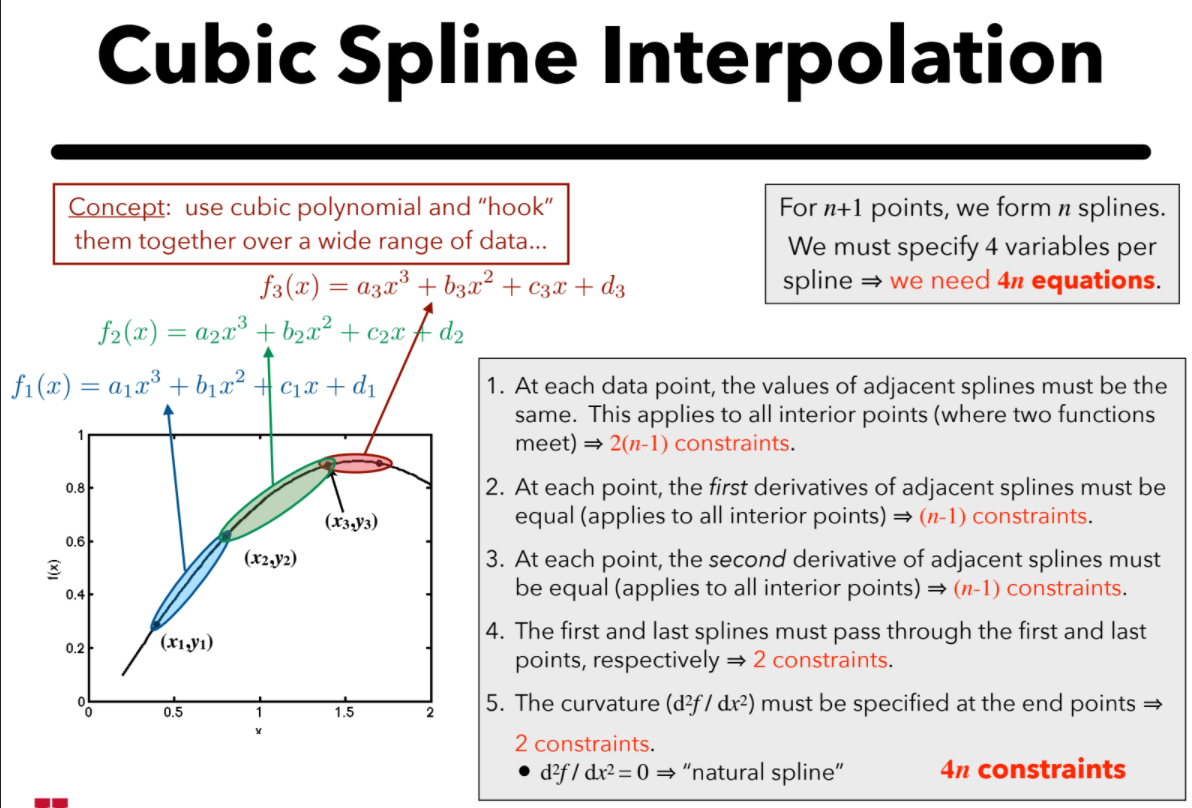

We will now attempt to do a cubic spline fit

In [18]:
from scipy.interpolate import CubicSpline

In [19]:
cs = CubicSpline(T, ρ)

Evaluate the density at T = 412 and 415

In [20]:
y412 = cs(412)
print(y412)

0.8466412606481153


Evaluate the density at T = 980 K. Does your answer make sense? Explain and then plot the cubic spline

In [21]:
cs(980)

array(0.3554157)

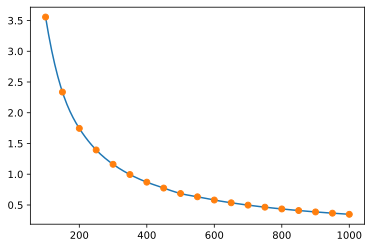

In [22]:
TT = np.linspace(100,1000,200)
ycs = cs(TT)
plt.plot(TT,ycs)
plt.plot(T,ρ,"o")